In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams['figure.figsize'] = [12, 10]
sns.set()
import statsmodels.api as sm
from sklearn.metrics import r2_score

from statsmodels.tsa.api import ExponentialSmoothing


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


## Declaring the Model

In [ ]:
def seasonal_decompose (y):
    decomposition = sm.tsa.seasonal_decompose(y, model='additive',extrapolate_trend='freq')
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()

In [ ]:
def holt_win_sea(df, y,y_to_train,y_to_test,seasonal_type,seasonal_period,predict_date):
    
    y.plot(marker='o', color='black', legend=True, figsize=(14, 7))

    
    fit2 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='add', seasonal='add', damped=True).fit(use_boxcox=False)
    fcast2 = fit2.forecast(predict_date).rename('Additive')
    mse2 = ((fcast2 - y_to_test) ** 2).mean()
    
    df['Additive Predictions'] = fcast2
    fit2.fittedvalues.plot(style='--', color='green')
    fcast2.plot(style='--', marker='o', color='green', legend=True)
 
    plt.show()

## Defining Performance metrics


In [ ]:
## Performance evaluation
def performance_measures(y_test,y_pred):
    

    mae = np.mean(abs(y_pred - y_test))
    medae = np.median(abs(y_pred-y_test))
    rmse = np.sqrt(np.mean(np. square(y_pred - y_test)))
    
    return [mae, medae, rmse,]

## Including Covid Data

In [ ]:
df = pd.read_csv("final_dataset.csv") 
df_covid = df.copy()
df_no_covid = df.copy()
df_lsoa = df.copy()

In [ ]:
## Creating dataframes of crime amount per year per month 
df_covid = df_covid.groupby(['Year', 'Month']).sum()[['Amount']]
df_covid = df_covid.reset_index()

df_covid['Date_time'] = df_covid['Year'].astype(str) +"-"+ df_covid['Month'].astype(str)
df_covid['Date_time'] = pd.to_datetime(df_covid['Date_time'])
df_covid = df_covid.set_index('Date_time')

y_covid = df_covid['Amount']


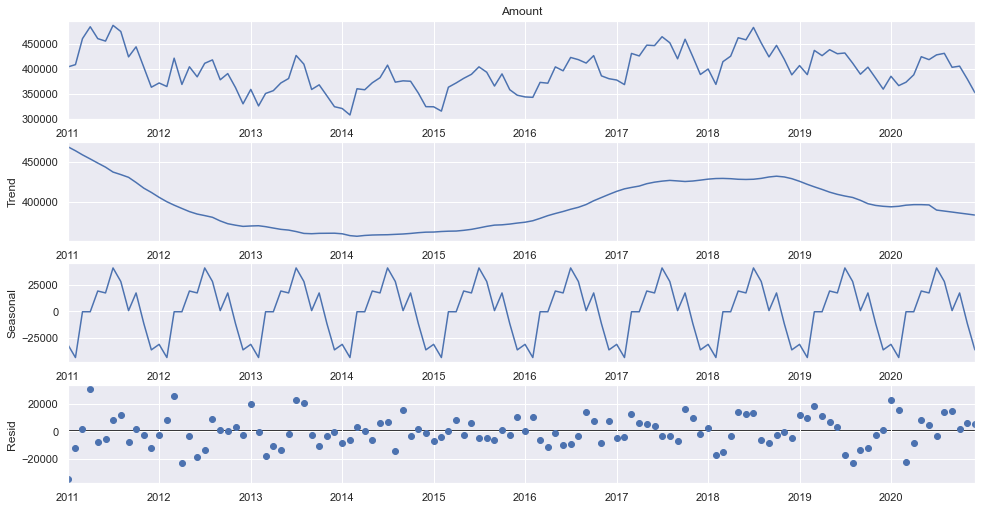

In [ ]:
seasonal_decompose(y_covid)

In [ ]:
y_train_covid = y_covid[:'2019-01-01'] # dataset to train
y_test_covid = y_covid['2019-01-01':] # last X months for test  
predict_date_covid = len(y_covid) - len(y_covid[:'2019-01-01']) # the number of data points for the test set

test_df_covid = df_covid['2019-01-01':] # last X months for test

<ipython-input-4-fa6c2f201363>:6: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit2 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='add', seasonal='add', damped=True).fit(use_boxcox=False)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:1112: FutureWarning: Setting use_boxcox during fit has been deprecated and will be removed after 0.13. It must be set during model initialization.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarnin

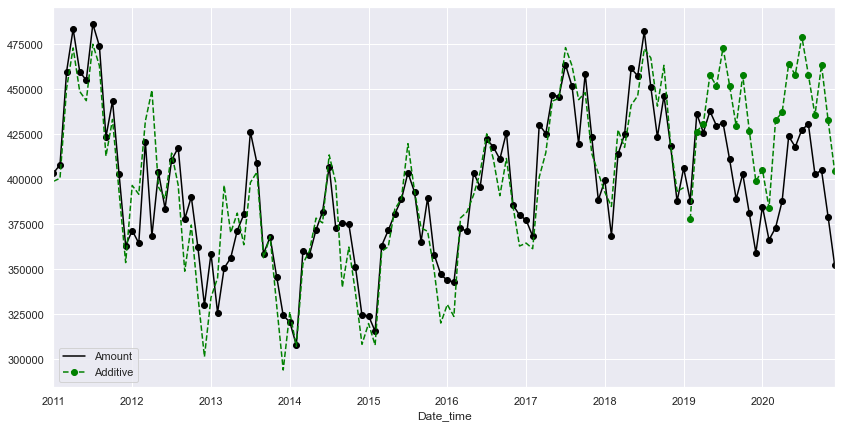

In [ ]:
holt_win_sea(test_df_covid, y_covid, y_train_covid,y_test_covid,'additive', 12 , predict_date_covid)

## Not including Covid Data

In [ ]:
split_date = '2020-01-01'

## Creating dataframes of crime amount per year per month 
df_no_covid = df_no_covid.groupby(['Year', 'Month']).sum()[['Amount']]
df_no_covid = df_no_covid.reset_index()

df_no_covid['Date_time'] = df_no_covid['Year'].astype(str) +"-"+ df_no_covid['Month'].astype(str)
df_no_covid['Date_time'] = pd.to_datetime(df_no_covid['Date_time'])

df_no_covid = df_no_covid.loc[df_no_covid['Date_time'] < split_date]
df_no_covid = df_no_covid.set_index('Date_time')


y_nocov = df_no_covid['Amount']

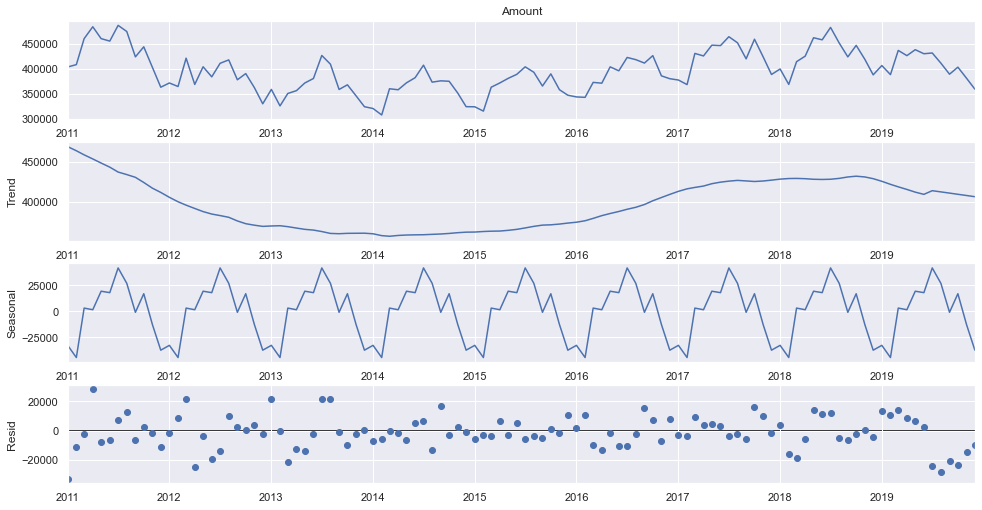

In [ ]:
seasonal_decompose(y_nocov)

In [ ]:
y_train_nocov= y_nocov[:'2018-01-01'] # dataset to train
y_test_nocov = y_nocov['2018-01-01':] # last X months for test  
predict_date_nocov = len(y_nocov) - len(y_nocov[:'2018-01-01']) # the number of data points for the test set

test_df_nocov = df_no_covid['2018-01-01':] # last X months for test  


<ipython-input-3-3cc9ae97b374>:10: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit2 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='add', seasonal='add', damped=True).fit(use_boxcox=False)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:1112: FutureWarning: Setting use_boxcox during fit has been deprecated and will be removed after 0.13. It must be set during model initialization.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarni

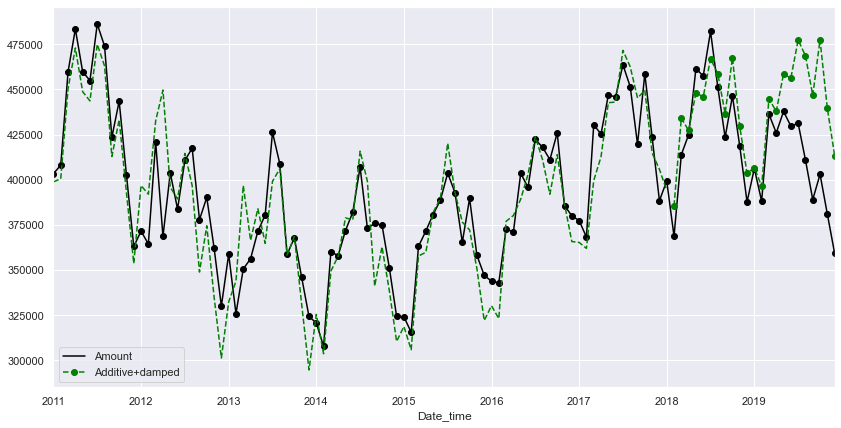

In [ ]:
holt_win_sea(test_df_nocov,y_nocov, y_train_nocov ,y_test_nocov,'additive', 12 , predict_date_nocov)

## Individual LSOA Codes

### LSOA Codes for deeper analysis 

#### E01000005 - Urban 

#### E01030759 - Town and Fringe 

#### E01020795  - Village Hamlet & Isolated Dwellings

In [ ]:
df_test = pd.read_csv("all_variables.csv")

In [ ]:
df_lsoa = df_test[['Year','Month', 'LSOA_code','LSOA_name', 'Type_I_crime_amount','Type_II_crime_amount']]



## Urban Crime Analysis

In [ ]:
df_urban = df_lsoa[df_lsoa['LSOA_code'] == 'E01000005']

In [ ]:
split_date = '2018-12-31'

df_urban['Date_time'] = df_urban['Year'].astype(str) +"-"+ df_urban['Month'].astype(str)
df_urban['Date_time'] = pd.to_datetime(df_urban['Date_time'])

df_urban = df_urban.loc[df_urban['Date_time'] < split_date]
df_urban = df_urban.set_index('Date_time')


<ipython-input-4-fa6c2f201363>:6: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit2 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='add', seasonal='add', damped=True).fit(use_boxcox=False)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:1112: FutureWarning: Setting use_boxcox during fit has been deprecated and will be removed after 0.13. It must be set during model initialization.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The '

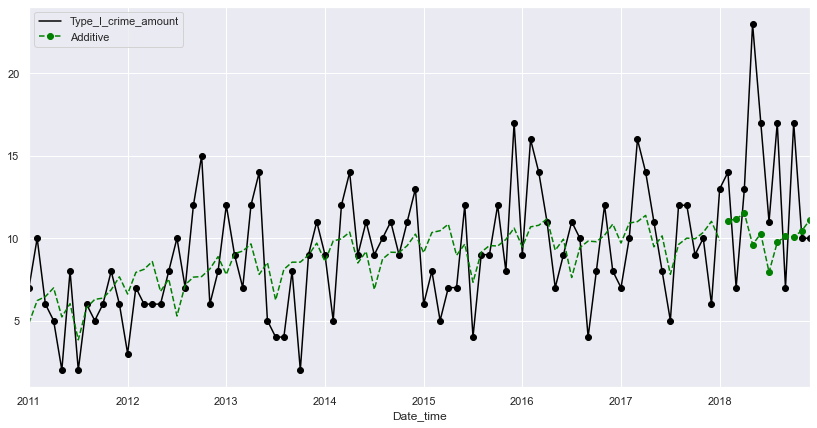

In [ ]:
## TYPE 1 CRIME AMOUNT

y_urban_1 = df_urban['Type_I_crime_amount']

y_train_urb_1 = y_urban_1[:'2018-01-01'] # dataset to train
y_test_urb_1 = y_urban_1['2018-01-01':] # last X months for test  
predict_date_urb_1 = len(y_urban_1) - len(y_urban_1[:'2018-01-01']) # the number of data points for the test set

test_df_urb_1 = df_urban['2018-01-01':] # last X months for test  

holt_win_sea(test_df_urb_1, y_urban_1, y_train_urb_1 ,y_test_urb_1,'additive', 12 , predict_date_urb_1)


In [ ]:
## Performanced Evaluations

test_df_urb_1 = test_df_urb_1.dropna()

y_test_urb_1 = test_df_urb_1['Type_I_crime_amount']
y_pred_damped_urb_1 = test_df_urb_1['Additive Predictions']
round_damped_urb_1 = [round(num, 3) for num in y_pred_damped_urb_1]

performance_measures(y_test_urb_1, y_pred_damped_urb_1)


[4.6020922729942875, 3.1284565740125263, 5.8268773489529115]

In [ ]:
## TYPE 2 CRIME AMOUNT

y_urban_2 = df_urban['Type_II_crime_amount']

y_train_urb_2 = y_urban_2[:'2018-01-01'] # dataset to train
y_test_urb_2 = y_urban_2['2018-01-01':] # last X months for test  
predict_date_urb_2 = len(y_urban_2) - len(y_urban_2[:'2018-01-01']) # the number of data points for the test set

test_df_urb_2 = df_urban['2018-01-01':] # last X months for test 

<ipython-input-4-fa6c2f201363>:6: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit2 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='add', seasonal='add', damped=True).fit(use_boxcox=False)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:1112: FutureWarning: Setting use_boxcox during fit has been deprecated and will be removed after 0.13. It must be set during model initialization.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The '

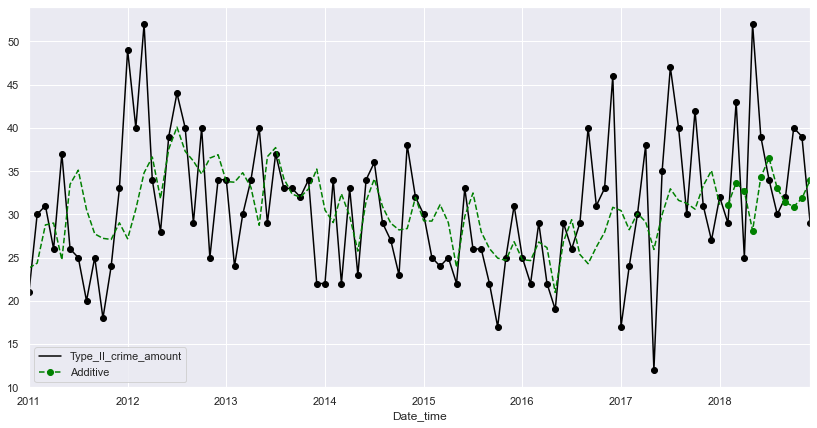

In [ ]:
holt_win_sea(test_df_urb_2, y_urban_2, y_train_urb_2 ,y_test_urb_2,'additive', 12 , predict_date_urb_2)


In [ ]:
## Performanced Evaluations

test_df_urb_2 = test_df_urb_2.dropna()

y_test_urb_2 = test_df_urb_2['Type_II_crime_amount']
y_pred_damped_urb_2 = test_df_urb_2['Additive Predictions']
round_damped_urb_2 = [round(num, 3) for num in y_pred_damped_urb_2]

performance_measures(y_test_urb_2, y_pred_damped_urb_2)



[6.821687744242936, 4.960052637028475, 9.13189215568599]

##  Town and Fringe Crime Analysis

In [ ]:
df_town = df_lsoa[df_lsoa['LSOA_code'] == 'E01030759']

In [ ]:
split_date = '2018-12-31'

df_town['Date_time'] = df_town['Year'].astype(str) +"-"+ df_town['Month'].astype(str)
df_town['Date_time'] = pd.to_datetime(df_town['Date_time'])

df_town = df_town.loc[df_town['Date_time'] < split_date]
df_town = df_town.set_index('Date_time')


<ipython-input-38-e675492eaddb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_town['Date_time'] = df_town['Year'].astype(str) +"-"+ df_town['Month'].astype(str)
<ipython-input-38-e675492eaddb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_town['Date_time'] = pd.to_datetime(df_town['Date_time'])


<ipython-input-4-fa6c2f201363>:6: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit2 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='add', seasonal='add', damped=True).fit(use_boxcox=False)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:1112: FutureWarning: Setting use_boxcox during fit has been deprecated and will be removed after 0.13. It must be set during model initialization.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The '

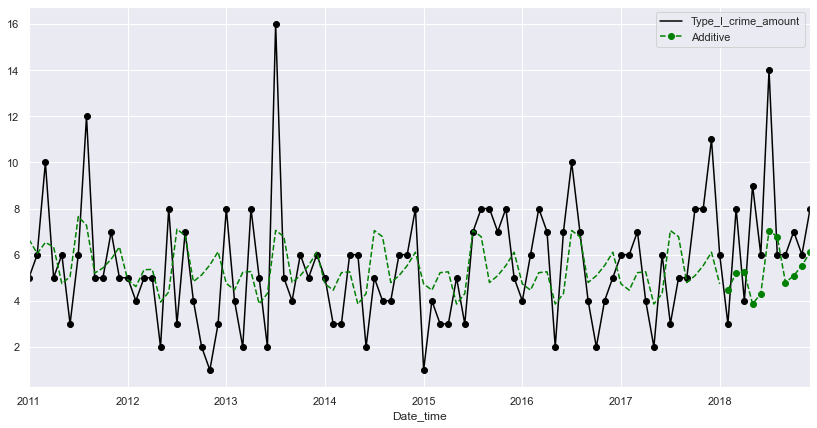

In [ ]:
## TYPE 1 CRIME AMOUNT

y_town_1 = df_town['Type_I_crime_amount']

y_train_town_1 = y_town_1[:'2018-01-01'] # dataset to train
y_test_town_1 = y_town_1['2018-01-01':] # last X months for test  
predict_date_town_1 = len(y_town_1) - len(y_town_1[:'2018-01-01']) # the number of data points for the test set

test_df_town_1 = df_town['2018-01-01':] # last X months for test  

holt_win_sea(test_df_town_1, y_town_1, y_train_town_1 ,y_test_town_1,'additive', 12 , predict_date_town_1)


In [ ]:
## Performanced Evaluations Crime 1 

test_df_town_1 = test_df_town_1.dropna()

y_test_town_1 = test_df_town_1['Type_I_crime_amount']
y_pred_damped_town_1 = test_df_town_1['Additive Predictions']
round_damped_town_1 = [round(num, 3) for num in y_pred_damped_town_1]

performance_measures(y_test_town_1, y_pred_damped_town_1)



[2.321956807000147, 1.687201398270573, 2.9935266718125075]

<ipython-input-4-fa6c2f201363>:6: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit2 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='add', seasonal='add', damped=True).fit(use_boxcox=False)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:1112: FutureWarning: Setting use_boxcox during fit has been deprecated and will be removed after 0.13. It must be set during model initialization.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The '

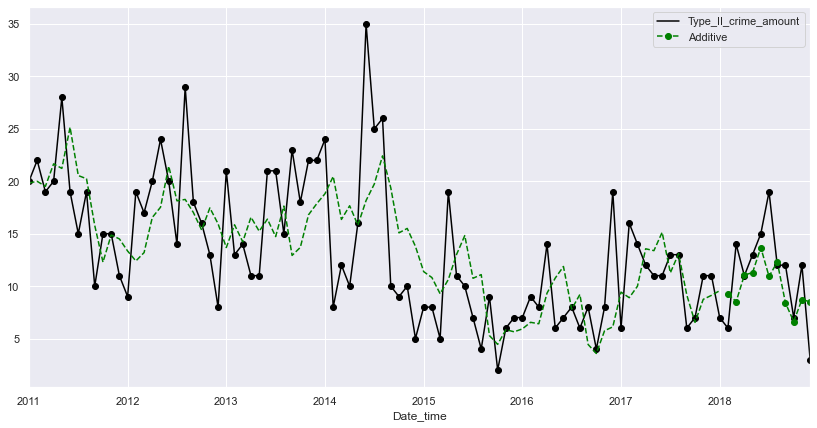

In [ ]:
## TYPE 2 CRIME AMOUNT

y_town_2 = df_town['Type_II_crime_amount']

y_train_town_2 = y_town_2[:'2018-01-01'] # dataset to train
y_test_town_2 = y_town_2['2018-01-01':] # last X months for test  
predict_date_town_2 = len(y_town_2) - len(y_town_2[:'2018-01-01']) # the number of data points for the test set

test_df_town_2 = df_town['2018-01-01':] # last X months for test  

holt_win_sea(test_df_town_2, y_town_2, y_train_town_2 ,y_test_town_2,'additive', 12 , predict_date_town_2)


In [ ]:
## Performanced Evaluations Crime 2 

test_df_town_2 = test_df_town_2.dropna()

y_test_town_2 = test_df_town_2['Type_I_crime_amount']
y_pred_damped_town_2 = test_df_town_2['Additive Predictions']
round_damped_town_2 = [round(num, 3) for num in y_pred_damped_town_2]

performance_measures(y_test_town_2, y_pred_damped_town_2)

 

[3.563510937387411, 2.711343628499515, 4.434649369324806]

##  Village Hamlet & Isolated Dwellings

In [ ]:
df_vil = df_lsoa[df_lsoa['LSOA_code'] == 'E01020795']

In [ ]:
split_date = '2018-12-31'

df_vil['Date_time'] = df_vil['Year'].astype(str) +"-"+ df_vil['Month'].astype(str)
df_vil['Date_time'] = pd.to_datetime(df_vil['Date_time'])

df_vil = df_vil.loc[df_vil['Date_time'] < split_date]
df_vil = df_vil.set_index('Date_time')



<ipython-input-47-541d1a9cfc33>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vil['Date_time'] = df_vil['Year'].astype(str) +"-"+ df_vil['Month'].astype(str)
<ipython-input-47-541d1a9cfc33>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vil['Date_time'] = pd.to_datetime(df_vil['Date_time'])


<ipython-input-4-fa6c2f201363>:6: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit2 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='add', seasonal='add', damped=True).fit(use_boxcox=False)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:1112: FutureWarning: Setting use_boxcox during fit has been deprecated and will be removed after 0.13. It must be set during model initialization.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The '

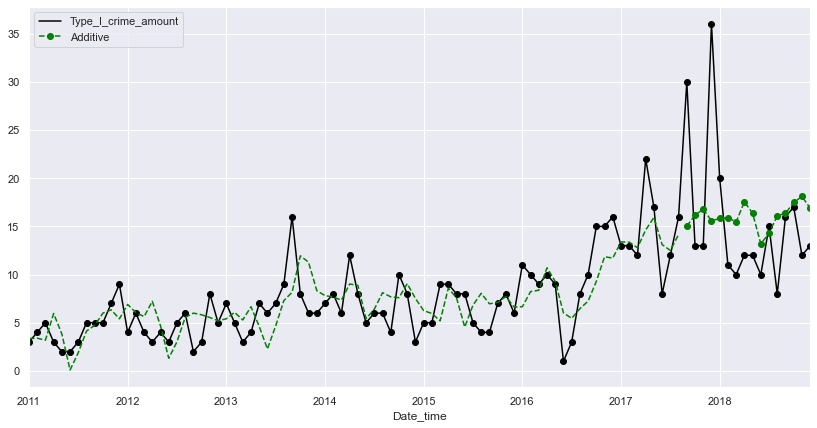

In [ ]:
## TYPE 1 CRIME AMOUNT

y_vil_1 = df_vil['Type_I_crime_amount']

y_train_vil_1 = y_vil_1[:'2017-08-01'] # dataset to train
y_test_vil_1 = y_vil_1['2017-08-01':] # last X months for test  
predict_date_vil_1 = len(y_vil_1) - len(y_vil_1[:'2017-08-01']) # the number of data points for the test set

test_df_vil_1 = df_vil['2017-08-01':] # last X months for test  

holt_win_sea(test_df_vil_1, y_vil_1, y_train_vil_1 ,y_test_vil_1,'additive', 12 , predict_date_vil_1)


In [ ]:
## Performanced Evaluations Crime 1 

test_df_vil_1 = test_df_vil_1.dropna()

y_test_vil_1 = test_df_vil_1['Type_I_crime_amount']
y_pred_damped_vil_1 = test_df_vil_1['Additive Predictions']
round_damped_vil_1 = [round(num, 3) for num in y_pred_damped_vil_1]

performance_measures(y_test_vil_1, y_pred_damped_vil_1)

[5.604821397474904, 4.2760462441045215, 7.5655504717862]

<ipython-input-4-fa6c2f201363>:6: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit2 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='add', seasonal='add', damped=True).fit(use_boxcox=False)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:1112: FutureWarning: Setting use_boxcox during fit has been deprecated and will be removed after 0.13. It must be set during model initialization.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The '

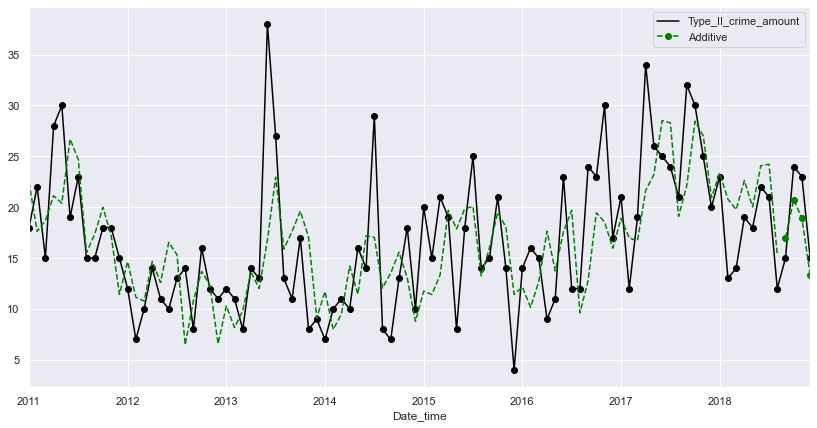

In [ ]:
## TYPE 2 CRIME AMOUNT

y_vil_2 = df_vil['Type_II_crime_amount']

y_train_vil_2 = y_vil_2[:'2018-08-01'] # dataset to train
y_test_vil_2 = y_vil_2['2018-08-01':] # last X months for test  
predict_date_vil_2 = len(y_vil_2) - len(y_vil_2[:'2018-08-01']) # the number of data points for the test set

test_df_vil_2 = df_vil['2018-08-01':] # last X months for test  

holt_win_sea(test_df_vil_2, y_vil_2, y_train_vil_2 ,y_test_vil_2,'additive', 12 , predict_date_vil_2)


In [ ]:
## Performanced Evaluations Crime 2 

test_df_vil_2 = test_df_vil_2.dropna()

y_test_vil_2 = test_df_vil_2['Type_II_crime_amount']
y_pred_damped_vil_2 = test_df_vil_2['Additive Predictions']
round_damped_vil_2 = [round(num, 3) for num in y_pred_damped_vil_2]

performance_measures(y_test_vil_2, y_pred_damped_vil_2)

[2.745769152078866, 2.624533209631526, 2.9160235945158357]

## Predictions for the Future


In [ ]:
urban_type1_model = ExponentialSmoothing(df_urban['Type_I_crime_amount'],trend='add',
                                   seasonal='add',seasonal_periods=12, damped=False).fit(use_boxcox=False)

urban_type2_model = ExponentialSmoothing(df_urban['Type_II_crime_amount'],trend='add',
                                   seasonal='add',seasonal_periods=12, damped=False).fit(use_boxcox=False)

town_type1_model = ExponentialSmoothing(df_town['Type_I_crime_amount'],trend='add',
                                   seasonal='add',seasonal_periods=12, damped=False).fit(use_boxcox=False)

town_type2_model = ExponentialSmoothing(df_town['Type_II_crime_amount'],trend='add',
                                   seasonal='add',seasonal_periods=12, damped=False).fit(use_boxcox=False)

vil_type1_model = ExponentialSmoothing(df_vil['Type_I_crime_amount'],trend='add',
                                   seasonal='add',seasonal_periods=12, damped=False).fit(use_boxcox=False)

vil_type2_model = ExponentialSmoothing(df_vil['Type_II_crime_amount'],trend='add',
                                   seasonal='add',seasonal_periods=12, damped=False).fit(use_boxcox=False)

<ipython-input-58-37e0857024d1>:1: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  urban_type1_model = ExponentialSmoothing(df_urban['Type_I_crime_amount'],trend='add',
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:1112: FutureWarning: Setting use_boxcox during fit has been deprecated and will be removed after 0.13. It must be set during model initialization.
  warnings.warn(
<ipython-input-58-37e0857024d1>:4: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  urban_type2_model = ExponentialSmoothi

In [ ]:
column_names = ["a", "b", "c"]

predictions = pd.DataFrame(columns = column_names)

In [ ]:
predictions['Urban Type 1 Crime'] = urban_type1_model.forecast(steps=48)

predictions['Urban Type 2 Crime'] = urban_type2_model.forecast(steps=48)

predictions['Town Type 1 Crime'] = town_type1_model.forecast(steps=48)

predictions['Town Type 2 Crime'] = town_type2_model.forecast(steps=48)

predictions['Village Type 1 Crime'] = vil_type1_model.forecast(steps=48)

predictions['Village Type 2 Crime'] = vil_type2_model.forecast(steps=48)

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/b

In [ ]:

predictions.to_csv("predictions.csv")